The dataset was downloaded from Kaggle 'https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition '

In [ ]:
!unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
replace test/apple/Image_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam




In [ ]:
def preprocess_img(img):
  img= cv2.resize(img,(150,150))
  img=img/255
  return img

In [ ]:
# prepare training data
img = []
labels = []

base_dir = '/content/train'

# Get the list of subfolders (categories)
categories = os.listdir(base_dir)

for each_category in categories:
    category_path = os.path.join(base_dir, each_category)
    files_list = os.listdir(category_path)

    for each_file in files_list:
        file_path = os.path.join(category_path, each_file)

        # Read and resize the image
        image_data = cv2.imread(file_path)
        if image_data is not None and image_data.size != 0:
            # Resize the image if it's not empty
            image_data = preprocess_img(image_data)
            img.append(image_data)
            labels.append(each_category)
        # Append the image data and label to the respective lists



# Convert the lists to NumPy arrays
x_train = np.array(img)
y_train = np.array(labels)

# Now, img contains the image data, and labels contains the corresponding labels


In [ ]:
#prepare files for validation

val_base_dir='/content/validation'

val_img=[]
val_labels=[]
val_categories = os.listdir(val_base_dir)

for each_category in val_categories:
    val_category_path = os.path.join(val_base_dir, each_category)
    val_files_list = os.listdir(val_category_path)

    for each_file in val_files_list:
        val_file_path = os.path.join(val_category_path, each_file)

        val_image_data = cv2.imread(val_file_path)
        if val_image_data is not None and val_image_data.size != 0:
            val_image_data = preprocess_img(val_image_data)
            val_img.append(val_image_data)
            val_labels.append(each_category)


x_val = np.array(val_img)
y_val = np.array(val_labels)

In [ ]:

#prepare files for test

test_base_dir='/content/test'

test_img=[]
test_labels=[]
test_categories = os.listdir(test_base_dir)

for each_category in test_categories:
    test_category_path = os.path.join(test_base_dir, each_category)
    test_files_list = os.listdir(test_category_path)

    for each_file in test_files_list:
        test_file_path = os.path.join(test_category_path, each_file)

        test_image_data = cv2.imread(test_file_path)
        if test_image_data is not None and test_image_data.size != 0:
            test_image_data = preprocess_img(test_image_data)
            test_img.append(test_image_data)
            test_labels.append(each_category)


x_test = np.array(test_img)
y_test = np.array(test_labels)

'raddish'

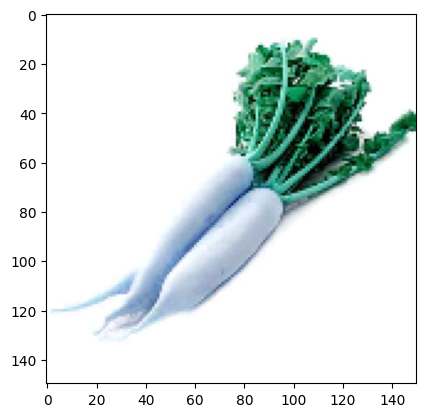

In [ ]:
#test a random image and its label
plt.imshow(x_val[80])
y_val[80]

In [ ]:
# preparing data for CNN network
# change labels to to_categorical format

labelencoder = LabelEncoder()
y_train=labelencoder.fit_transform(y_train)
y_train=to_categorical(y_train)

y_val=labelencoder.fit_transform(y_val)
y_val=to_categorical(y_val)

y_test=labelencoder.fit_transform(y_test)
y_test=to_categorical(y_test)




In [ ]:
'''#Data augmetation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,


)

datagen.fit(x_train)
'''
#it was unnecessary

'#Data augmetation\ndatagen = ImageDataGenerator(\n    rotation_range=40,\n    width_shift_range=0.2,\n    height_shift_range=0.2,\n    shear_range=0.2,\n    zoom_range=0.2,\n    \n    \n)\n\ndatagen.fit(x_train)\n'

In [ ]:
#def CNN model

def Conv_model():
    model= Sequential()
    model.add(Conv2D(60,(5,5),input_shape=(150,150,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(36, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.00014 ), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model= Conv_model()
print(model.summary())

history=model.fit(x_train,y_train,batch_size=18, validation_data=(x_val,y_val),epochs=15, steps_per_epoch=173, shuffle=1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 146, 146, 60)      4560      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 73, 73, 60)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 71, 71, 30)        16230     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 35, 35, 30)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 36750)             0         
                                                                 
 dense_2 (Dense)             (None, 512)              

Text(0.5, 0, 'epoch')

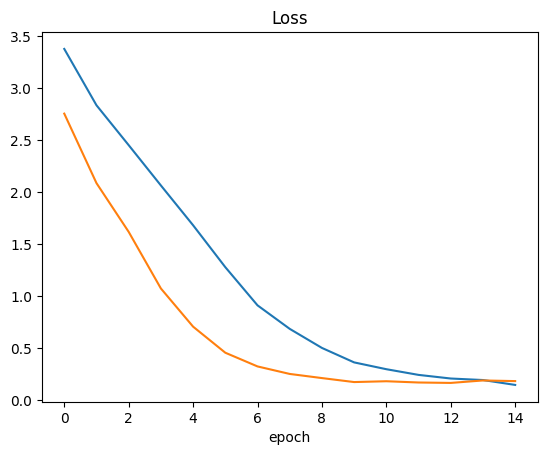

In [ ]:
#create chart of progress
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

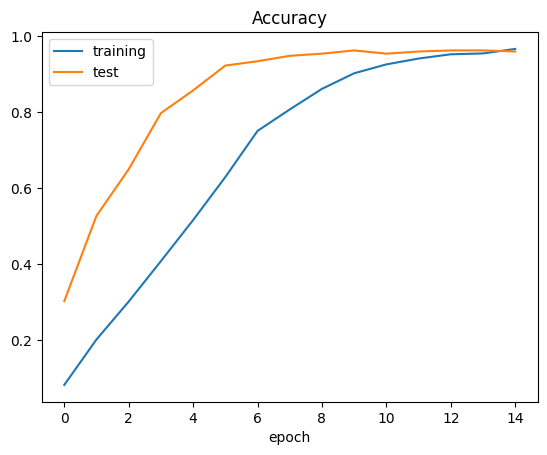

In [ ]:
#Plot performance(accuracy) per epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
#save the model
model.save('my_model.h10')


In [ ]:
# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=2)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])


12/12 - 0s - loss: 0.1801 - accuracy: 0.9610 - 157ms/epoch - 13ms/step
Test Loss: 0.18007215857505798
Test Accuracy: 0.961002767086029
